In [37]:
import numpy as np

# Parameters
m = 0.068 # (Kg)
g = 9.81 #(m/s^2)
k = 2*3.2654e-5 #(Nm^2/A^2) 
x0 = 7.3e-3 #(m)
i0 = 1.0 #(A)
R = 1.0 #(Ohm)
u0 = R*i0

# Magnetic force fm
def fm(i,x):
    return k/2*i*i/x/x
# Force Factor
def Bl(i,x):
     return k/2*i/x/x #(N/A)
# Inductance
def L(x):
     return k/x #(H)


# State space representation in vector form
# dy = y´ = function(y,t)
# y = [i,x,v,E]

# PID controller's parameters
kp=250
kd=10
ki=20

# PID controller
def pid_controller(e, v, E):
    return kp * e + ki * E + kd * v

# State space representation
def f(t,y):
    i,x,v, E = y

    # Additive noise with a zero-mean normal distribution
    noise = np.random.normal(0, 0.1*x0, 1)[0]
    
    # Error
    e = x - x0 + noise

    pid_controller_output = pid_controller(e, v, E)

    #di/dt
    di = -R/L(x)*i - Bl(i,x)/L(x)*v + (u0+pid_controller_output)/L(x)
    
    #dx/dt
    dx = v
    
    #dv/dt
    dv = g-fm(i,x)/m
    
    #dE/dt
    dE = e
    
    
    return [di, dx, dv, dE]

In [38]:
from scipy.integrate import solve_ivp

# Disturbance percentage
disturbance_percentage = 0.02
disturbance = x0 * disturbance_percentage

# Initial conditions
# y = [i,x,v,E]
y_0 = [i0,x0+disturbance,0.0, 0]

# Time span
t_0 = 0.0
t_end = 10 #(s) 

sol = solve_ivp(f, [t_0, t_end],y_0)

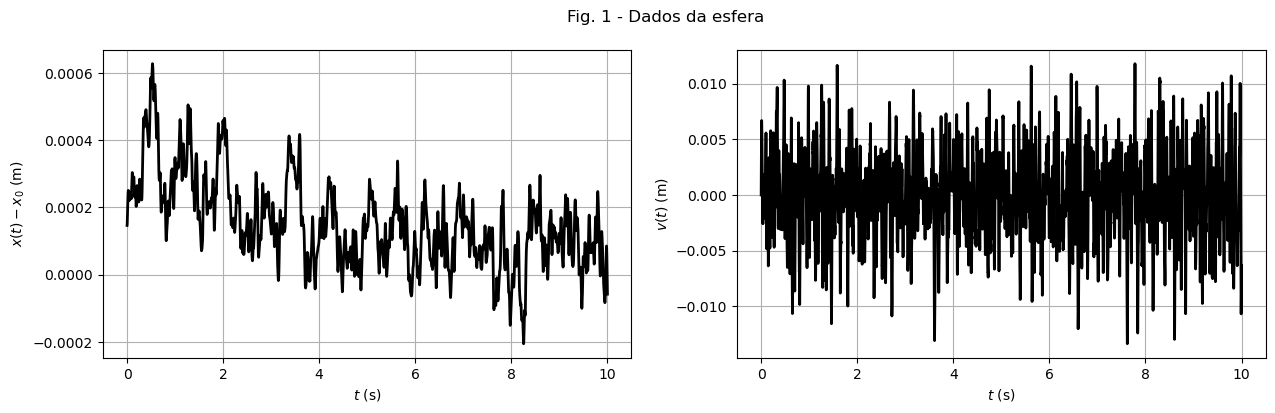

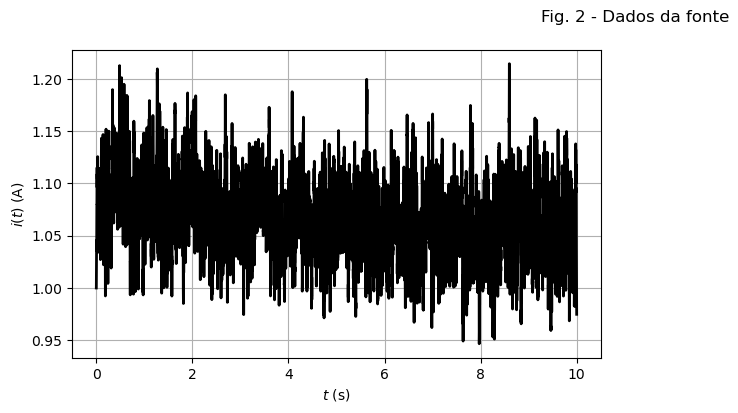

In [39]:
import matplotlib.pyplot as plt

# --- Position plot --- 
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[1,:]-x0, 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$ (s)');
plt.ylabel('$x(t)-x_0$ (m)');
fig.suptitle('Fig. 1 - Dados da esfera');

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[2,:], 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$ (s)');
plt.ylabel('$v(t)$ (m)');

# --- Source plot ---
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0,:], 'k', linewidth=2); 
plt.grid(True);
plt.xlabel('$t$ (s)');
plt.ylabel('$i(t)$ (A)');
fig.suptitle('Fig. 2 - Dados da fonte');